In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

color_ = sns.color_palette("Paired")
from deterministic_solution import sirvid_model
cols = ['susceptibles', 'vaccinated', 'infected', 'infected_vac', 'recovered', 'recovered_vac',
        'deceased', 'deceased_vac']
cols = cols[::-1]

In [66]:
"""
defining parameters
"""
days = 15  # average duration of disease
kappa = 2.5  # avg nb of interactions by day by individual
n_population = 1e6  # population size
s_init_perc = .6  # S0 (initial susceptible set as % of pop)
vac_init_perc = .35  # V0 (initial vaccinated set as % of pop)


# parameters for non vaccinated people
recovery_rate = .90  # recovery rate from disease
mortality = 1 - recovery_rate  # rate decease from disease
infection_rate = 0.14  # probability of infection for one interaction between susceptible and infected

# parameters for vaccinated people
vaccination_rate = 0.005  # vaccination rate
recovery_rate_vac = .99  # recovery rate from disease
vac_protect = .80  # decrease of infection rate thanks to vaccin as %

In [67]:
data = sirvid_model(days, kappa, n_population, s_init_perc, vac_init_perc, recovery_rate,
                    infection_rate, vaccination_rate, recovery_rate_vac, vac_protect)
data = data[cols]
data_norm = data / n_population

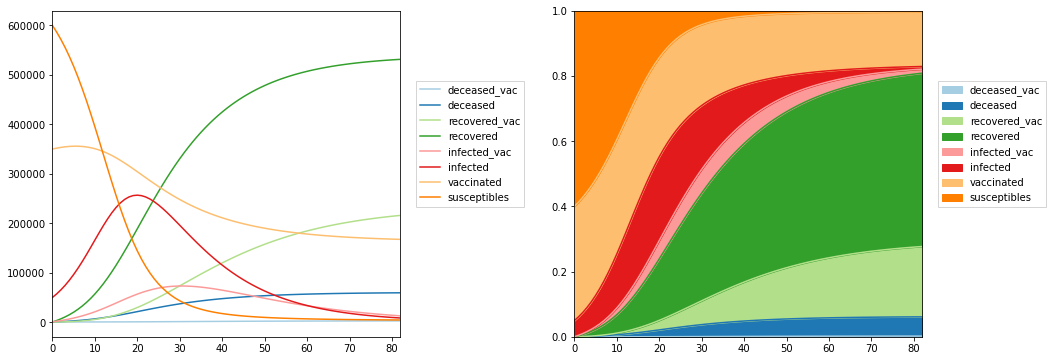

In [70]:
max_x = 82
f, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].set_xlim([0, max_x])

ax[1].set_xlim([0, max_x])
ax[1].set_ylim([0, 1])

data.iloc[:max_x+10].plot(ax=ax[0], color=color_)
data_norm.iloc[:max_x+10].plot.area(ax=ax[1], color=color_)

box = ax[0].get_position()
ax[0].set_position([box.x0 - box.width*0.02, box.y0, box.width*0.98, box.height])
ax[0].legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), fancybox=False, shadow=False, ncol=1)

box = ax[1].get_position()
ax[1].set_position([box.x0 + box.width*0.25, box.y0, box.width*0.98, box.height])
ax[1].legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), fancybox=False, shadow=False, ncol=1)
            
plt.show()

In [64]:
data

,deceased_vac,deceased,recovered_vac,recovered,infected_vac,infected,vaccinated,susceptibles
0,0.000000,0.000000,0.000000,0.000000,350.000000,49650.000000,350000.000000,600000.000000
1,0.233333,331.000000,23.100000,2979.000000,632.916667,56840.000000,352693.750000,586500.000000
2,0.655278,709.933333,64.872500,6389.400000,945.570684,64852.328739,355271.401539,571765.837927
3,1.285658,1142.282192,127.280165,10280.539724,1291.905493,73705.550261,357720.857873,555730.298634
4,2.146929,1633.652527,212.545928,14702.872740,1675.808670,83395.973188,360029.479157,538347.520862
...,...,...,...,...,...,...,...,...
145,635.642207,58569.694422,62928.578460,527127.249795,156.232233,177.661679,342818.877348,7586.063856
146,635.746361,58570.878833,62938.889787,527137.909496,147.945951,166.759887,342854.678467,7547.191217
147,635.844992,58571.990565,62948.654220,527147.915089,140.089940,156.526178,342890.407371,7508.571645
148,635.938385,58573.034073,62957.900156,527157.306660,132.642494,146.919664,342926.058346,7470.200222
